In [2]:
from datetime import datetime
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install xlsxwriter
#Tempo de execução: 0:00:16.139206
# Endereços dos Dados
ENDERECO_DADOS = r'./../../../bronze/'

# obtenção de dados
try:
    print('Obtendo dados do arquivo parquet...')

    # hora de início
    hora_inicio = datetime.now()

    # retornar o plano de execução
    df_bf_exec_plan = pl.scan_parquet(ENDERECO_DADOS + 'bolsa_familia_str_cache.parquet')

    # executar o plano de execução e obter os dados
    df_bf = df_bf_exec_plan.collect() # coletar os dados do plano de execução

    print(df_bf.head())
    print(df_bf.columns)
    print(df_bf.dtypes)

    # hora de término
    hora_fim = datetime.now()

    print(f'Tempo de execução: {hora_fim - hora_inicio}')

    print('Dados obtidos com sucesso!')

except Exception as e:
    print(f'Erro ao obter dados: {e}')

Obtendo dados do arquivo parquet...
shape: (5, 9)
┌────────────┬────────────┬─────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ MÊS COMPET ┆ MÊS        ┆ UF  ┆ CÓDIGO     ┆ … ┆ CPF        ┆ NIS        ┆ NOME FAVO ┆ VALOR     │
│ ÊNCIA      ┆ REFERÊNCIA ┆ --- ┆ MUNICÍPIO  ┆   ┆ FAVORECIDO ┆ FAVORECIDO ┆ RECIDO    ┆ PARCELA   │
│ ---        ┆ ---        ┆ cat ┆ SIAFI      ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│ str        ┆ str        ┆     ┆ ---        ┆   ┆ str        ┆ i64        ┆ str       ┆ f64       │
│            ┆            ┆     ┆ i64        ┆   ┆            ┆            ┆           ┆           │
╞════════════╪════════════╪═════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 202501     ┆ 202308     ┆ SP  ┆ 7071       ┆ … ┆ ***.085.10 ┆ 2064389044 ┆ FERNANDA  ┆ 650.0     │
│            ┆            ┆     ┆            ┆   ┆ 6-**       ┆ 5          ┆ RAMOS     ┆           │
│            ┆            ┆     ┆        

In [3]:
try:
    array_valor_parcela = np.array(df_bf['VALOR PARCELA'])

except Exception as e:
    print(f'Erro ao processar dados: {e}')

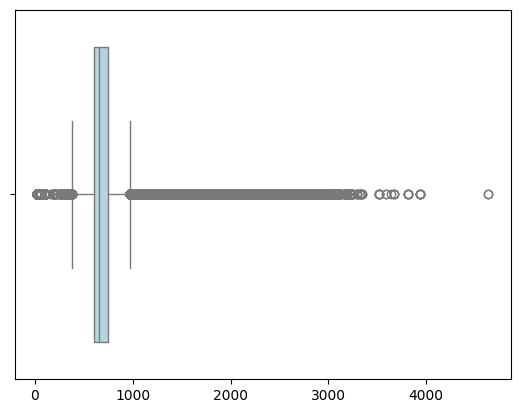

In [6]:
# Visualiza as Distribuições dos valores das parcelas "Boxplot"
try:
    #plt.figure(figsize=(10, 6))
    sns.boxplot(x=array_valor_parcela, color='lightblue')
    # #plt.title('Distribuição dos Valores das Parcelas do Bolsa Família')
    # plt.xlabel('Valor da Parcela (R$)')
    # plt.grid(True)
    # plt.tight_layout()
    plt.show()

except Exception as e:
    print(f'Erro ao plotar o gráfico: {e}')

In [6]:
# Mostrar a frequência dos valores das parcelas
try:
    print('frequencia dos valores das parcelas:')
    df_frequencia = (
    df_bf.group_by('VALOR PARCELA')
    .agg(pl.len().alias('FREQUÊNCIA')) 
    .sort('FREQUÊNCIA', descending=True)
    )

    # Exibir as 10 primeiras frequências
    print(df_frequencia.head(10))

    # Obtera a moda

    moda_valor = df_frequencia[0, 'VALOR PARCELA']
    moda_freq = df_frequencia[0, 'FREQUÊNCIA']

    # exporta para excel
    df_frequencia.write_excel(ENDERECO_DADOS + 'frequencia_valores_parcela.xlsx')


    print(f'Moda: Valor = {moda_valor}, Frequência = {moda_freq}')
except Exception as e:
    print(f'Erro ao processar dados para o histograma: {e}')

frequencia dos valores das parcelas:
shape: (10, 2)
┌───────────────┬────────────┐
│ VALOR PARCELA ┆ FREQUÊNCIA │
│ ---           ┆ ---        │
│ f64           ┆ u32        │
╞═══════════════╪════════════╡
│ 600.0         ┆ 28828754   │
│ 650.0         ┆ 16161736   │
│ 750.0         ┆ 13130225   │
│ 800.0         ┆ 8029497    │
│ 700.0         ┆ 6764836    │
│ 300.0         ┆ 3610672    │
│ 325.0         ┆ 3263849    │
│ 900.0         ┆ 2889959    │
│ 850.0         ┆ 2537397    │
│ 375.0         ┆ 1904609    │
└───────────────┴────────────┘
Moda: Valor = 600.0, Frequência = 28828754


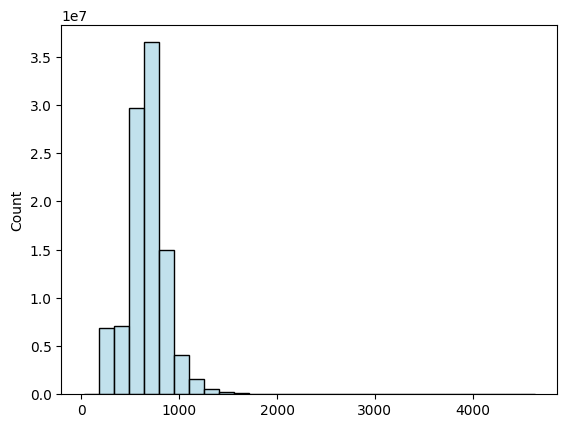

In [5]:
#visualizar a Frequência dos valores das parcelas em histograma
try:
    bins = np.arange(0, 4800, 100)  # Definindo os bins para o histograma
    sns.histplot(array_valor_parcela, bins=30, color='lightblue')
    plt.show()

except Exception as e:
    print(f'Erro ao plotar o histograma: {e}')